In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Reinforcement Learning

One of the primary goals of artificial intelligence (AI) is to produce fully autonomous agents that are able to interact with their environments through trial-and-error to learn optimal behaviors. This experience-driven autonomous learning is known as **reinforcement learning (RL)** [269].

###  Basic Concepts and Theory

The reinforcement learning machine learns to achieve a goal by trial-and-error interaction within a dynamic environment. At each discrete-time step $ t \in \{0, 1, 2, \dots\} $, the agent observes the state description vector $ s_t $ of the environment and decides and takes an action $ a_t \in A(s_t) $ based on the state $ s_t $. After receiving a reward signal from the environment, $ r_t \in R $, the agent decides the action to be performed via a function called a **policy** $ \pi(s) = a $, which could also be stochastic $ \pi(a|s) = \Pr\{a_t = a | s_t = s\} $.

A policy that maximizes the cumulative reward is denoted as $ \pi^* $. The policy gives probabilities of selecting actions for a certain state. Then the environment state moves to the next state $ s_{t+1} $, and thus the agent obtains a new reward $ r_{t+1} $, where the state $ s_{t+1} $ is drawn from a transition probability with respect to the previous state $ s_t $ and the action $ a_t $. The sequence of the steps from an initial state to a terminal state is called an **episode**.

By [137], a standard reinforcement learning model usually consists of:
- An agent
- A discrete set of environment states $ s_t $, $ S = \{s_t\} $
- A discrete set of agent actions $ a_t $, $ A = \{a_t\} $
- A reward function $ R: S \times A \rightarrow R $

### Definition : Agent

An **agent** refers to a hardware or (more usually) software-based computer system that enjoys the following properties:
- **Autonomy**: Agents operate without the direct intervention of humans or others, and have some kind of control over their actions and internal state.
- **Social ability**: Agents interact with other agents (and possibly humans) via some kind of agent-communication language.
- **Reactivity**: Agents operate in their environment (which may be the physical world or a user) and respond in a timely fashion to changes that occur in it.
- **Pro-activeness**: Agents do not simply act in response to their environment, they are able to exhibit goal-directed behavior by taking the initiative.

### Definition : State

A **state** refers to all variables (discrete or continuous) that are necessary to model a system. All states of a system are compactly denoted as a vector $ s $. A state $ s $ contains all relevant information about the current situation to predict future states (or observables) of a system.

### Definition : State-Action Space

The mathematical space spanned by actions $ a $ and states $ s $ jointly is known as the **state-action space**. Solving a movement task can be thought of as finding a path between two points in this space, the initial state and the goal state.

Reinforcement learning is based on the interaction between an agent and its environment. The agent selects the action $ a_t $, resulting in a change in state $ s_t $ and a reward $ r_t $ returned by the environment.

### Definition: Action 

An **action** refers to all variables (discrete or continuous) that can actively change the state of a system. Usually, actions are motor commands, abbreviated as a vector $ a $.

### Definition : Reward Function 

A function $ r_t $ is called a **reward function** if it provides a scalar (discrete or continuous) value about the goodness of an action $ a $ in a state $ s $.

There are three different types of commonly used reward functions [147]:
- Rewards depending only on the current state $ R = R(s) $
- Rewards depending on the current state and action $ R = R(s, a) $


## Reinforcement Learning

One of the primary goals of artificial intelligence (AI) is to produce fully autonomous agents that can interact with their environments through trial-and-error to learn optimal behaviors. This experience-driven autonomous learning is called **reinforcement learning (RL)** [269].

### Basic Concepts and Theory

Reinforcement learning proceeds by trying actions in a particular state and updating an evaluation function that assigns expected rewards to possible actions. After learning, the action $ a $ with the highest expected value in each state is chosen to achieve the task goal . 

The goal of reinforcement learning is to find a mapping from states $ s_t $ to actions $ a_t $, called a policy $ \pi $, that picks actions $ a $ in given states $ s $, maximizing the cumulative expected reward.

### Definition : Control Policy 

A function is known as a **control policy** if it maps the state $ s $ of a movement system and its environment into an appropriate action $ a $ for a particular task, i.e.,

$$
a = \pi(s, t, \alpha)
$$

The function $ \pi $ can directly depend on the time $ t $, and the vector of open parameters $ \alpha $, that may be useful to adjust the policy for a particular task goal.

#### Types of Policies [147]:

- **Deterministic policy**: $ \pi $ always uses the exact same action for a given state in the form:

$$
a = \pi(s)
$$

- **Probabilistic policy**: $ \pi $ draws a sample from a distribution over actions when it encounters a state, i.e., 

$$
a \sim \pi(s, a) = P(a|s)
$$

The agent's goal is to minimize its average long-term penalty and deduce a "good" or ideally optimal policy $ \pi $.

### Reinforcement Learning Process

Reinforcement learning is the process of learning through interaction with its environment. The agent starts by receiving a scalar value, known as a **payoff**, for transitions from one state to another. The goal is to determine a **control policy** that maximizes the **return**, which refers to the expected future **discounted sum** of payoffs.

### Differences Between Reinforcement and Supervised Learning [138]

- In reinforcement learning, there are no input/output pairs. Instead, after choosing an action, the agent is given the immediate reward and the subsequent state but is not told which action is optimal.
- Reinforcement learning uses a **Markov decision process (MDP)**, while supervised learning uses a **linear** or **nonlinear classification/regression model**.
- In supervised learning, the agent is directly presented with independent examples of correct predictions, while in imitation learning, demonstrations are provided for actions of a good strategy in given situations [147].

### Definition : Function Approximation 

**Function approximation** is a family of mathematical and statistical techniques used to represent a function of interest when it is computationally or information-theoretically intractable to represent the function exactly. 

In reinforcement learning, function approximation is based on **sample data** collected during interaction with the environment. Function approximation is critical in nearly every reinforcement learning problem, especially in continuous state ones [147].

### Common Optimal Behavior Models :

1. **Finite-horizon model**: At a given moment in time, the agent optimizes its expected reward for the next $ h $ steps:

$$
\sum_{t=0}^{h} \mathbb{E}[r_t]
$$

where $ r_t $ represents the scalar reward received $ t $ steps into the future.

2. **Infinite-horizon discounted model**: This model considers the long-run reward, but future rewards are geometrically discounted by a factor $ \gamma $, where $ 0 \leq \gamma < 1 $:

$$
\sum_{t=0}^{\infty} \mathbb{E}[\gamma^t r_t]
$$

Here, $ \gamma $ can be interpreted as an interest rate, a probability of living another step, or a mathematical trick to bound the infinite sum.

3. **Average-reward model**: The agent optimizes its long-run average reward:

$$
\lim_{h \to \infty} \sum_{t=0}^{h} \mathbb{E}[r_t]
$$

This model can be seen as the limiting case of the infinite-horizon discounted model as the discount factor $ \gamma $ approaches 1 [24]. The policy that optimizes this is called a **gain optimal policy**.


### Markov Decision Process (MDP)

A **Markov decision process (MDP)** is a discrete-time stochastic control process used to model the synchronous interaction between an agent and its environment [138]. It corresponds to the standard reinforcement learning model where the environment at time step $ t $ is represented by a finite set of state description vectors $ S = \{s_1, \dots, s_n\} $, and the agent performs actions from a finite discrete set $ A = \{a_1, \dots, a_n\} $.

Associated with each action in each state is a **state transition function** $ P(s_{t+1} | s_t, a_t) $, which determines the probability of transitioning from state $ s_t $ to state $ s_{t+1} $ given that action $ a_t $ was taken.

### Markov Decision Process as a Five-Tuple

An MDP can be described as a five-tuple $ (S, A, P, R, \gamma) $:

1. **State space $ S $**: A finite set of states $ S = \{s_1, \dots, s_n\} $.
2. **Action space $ A $**: A finite set of actions $ A = \{a_1, \dots, a_n\} $.
3. **State transition function $ P(s_{t+1} | s_t, a_t) $**: A probability distribution over transitions from state $ s_t $ to $ s_{t+1} $ given action $ a_t $.
4. **Reward function $ R(s_t, a_t) $**: The immediate reward function, generating an instantaneous reward $ r_{t+1} = R(s_t, a_t, s_{t+1}) $ for a transition from state $ s_t $ to $ s_{t+1} $ via action $ a_t $. The expected reward is given by:

   $$
   R_{sa} = \mathbb{E}[r_{t+1} | s_t = s, a_t = a]
   $$

5. **Discount factor $ \gamma \in [0, 1] $**: A pre-defined factor representing the difference in importance between future rewards and immediate rewards.

### Interaction between Agent and Environment

On each step of interaction, the agent receives as input some indication of the current state $ s_t $ of the environment. The agent chooses an action $ a_t $, which causes the state of the environment to change, and the value of this state transition is communicated through a scalar **reinforcement signal** $ r_t $.

The agent's behavior is defined by a **policy** $ \pi $, which maps states to actions:

$$
\pi = [\pi(s_1), \dots, \pi(s_{|S|})]
$$

where $ |S| $ is the number of states. Following policy $ \pi $, whenever the learner is in state $ s_t $, it applies action $ a_t = \pi(s_t) $.

### State Value Function

Each policy has a corresponding **evaluation function** $ V(s) $, which defines the expected cumulative discounted reward from state $ s $ following policy $ \pi $:

$$
V^\pi(s) = \mathbb{E}_\pi \left[ \sum_{t=0}^{\infty} \gamma^t R(s_t, \pi(s_t)) \mid s_0 = s \right]
$$

where $ \gamma \in [0, 1] $ is the discount factor. If $ \gamma = 0 $, the evaluation function only represents immediate rewards. Otherwise, it represents the expected discounted return over an infinite number of time steps.

### Definition: Improvement

Let $ \pi $ and $ \pi' $ be two policies. Policy $ \pi' $ is an **improvement** over policy $ \pi $ if:

$$
V^{\pi'}(s) \geq V^{\pi}(s), \quad \forall s \in S
$$

with strict inequality holding for at least one state.

### Control Policy and Bellman Equation

The state at time $ t+1 $ is determined by the system function:

$$
s_{t+1} = f(s_t, a_t), \quad a_t \in A, \quad \forall t > 0
$$

For each control action $ a_t $, a reward or punishment is presumed based on improvement or deterioration of the system state. The immediate reward function is:

$$
R(s_t, a_t) = \sum_{t=0}^{\infty} \gamma^t r(s_t, a_t), \quad 0 < \gamma < 1
$$

The **state value function** is defined as the maximum value of the immediate reward functions:

$$
V(s) = \max_{a_t \in A} R(s_t, a_t)
$$

The state value function can be described by the **Bellman equation**:

$$
V(s) = \max_{a \in A} \left[ r(s, a) + \gamma V(f(s, a)) \right]
$$

### Optimal Control Policy

The aim of the system is to find an optimal control policy that maximizes the expected future discounted payoff, called the **return**. The optimal control policy is given by:

$$
a^*(s) = \arg\max_{a \in A} \left[ r(s, a) + \gamma V(f(s, a)) \right]
$$

The corresponding **action-value function** (or **Q-function**) is:

$$
Q(s, a) = r(s, a) + \gamma V(f(s, a))
$$

Thus, the state value function can also be expressed in terms of the Q-function:

$$
V(s) = \max_{a \in A} Q(s, a)
$$

Finally, the optimal control policy can be rewritten as:

$$
a^*(s) = \arg\max_{a \in A} Q(s, a)
$$


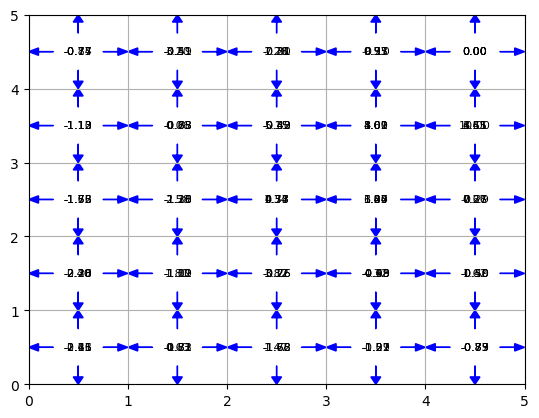

In [1]:
import random
import matplotlib.pyplot as plt

# Step 1: Define the environment
states = [(i, j) for i in range(5) for j in range(5)]  # 5x5 grid world
actions = ['up', 'down', 'left', 'right']  # Possible actions

# Step 2: Reward function
def get_reward(state):
    if state == (4, 4):  # Goal state with a high reward
        return 10
    return -1  # Default reward for every other state

# Step 3: Define the next state based on action
def next_state(state, action):
    i, j = state
    if action == 'up' and i > 0:
        return (i - 1, j)
    elif action == 'down' and i < 4:
        return (i + 1, j)
    elif action == 'left' and j > 0:
        return (i, j - 1)
    elif action == 'right' and j < 4:
        return (i, j + 1)
    return state  # Return the same state if out of bounds

# Step 4: Initialize Q-values
Q = {}
for state in states:
    Q[state] = {action: 0 for action in actions}  # Initialize Q-values to 0 for each state-action pair

# Q-learning parameters
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.1  # Exploration rate

# Step 5: Q-learning algorithm
def q_learning(episodes=500):
    for episode in range(episodes):
        state = (0, 0)  # Starting state
        while state != (4, 4):  # Until the agent reaches the goal state
            # Choose action (epsilon-greedy strategy)
            if random.uniform(0, 1) < epsilon:
                action = random.choice(actions)  # Explore: choose a random action
            else:
                action = max(Q[state], key=Q[state].get)  # Exploit: choose the best action based on Q-values
            
            # Get the next state and reward
            next_s = next_state(state, action)
            reward = get_reward(next_s)
            
            # Update the Q-value using the Bellman equation
            Q[state][action] = Q[state][action] + alpha * (reward + gamma * max(Q[next_s].values()) - Q[state][action])
            
            state = next_s  # Move to the next state

# Train the agent
q_learning()

# Step 6: Plot the learned Q-values and optimal actions
def plot_q_values():
    fig, ax = plt.subplots()
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)

    for state in states:
        i, j = state
        for action in actions:
            q_value = Q[state][action]
            # Draw arrows indicating optimal actions
            if action == 'up':
                ax.arrow(j + 0.5, i + 0.75, 0, 0.15, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            elif action == 'down':
                ax.arrow(j + 0.5, i + 0.25, 0, -0.15, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            elif action == 'left':
                ax.arrow(j + 0.25, i + 0.5, -0.15, 0, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            elif action == 'right':
                ax.arrow(j + 0.75, i + 0.5, 0.15, 0, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
            
            # Annotate the Q-values
            ax.text(j + 0.5, i + 0.5, f'{q_value:.2f}', fontsize=8, ha='center', va='center')

    plt.grid(True)
    plt.show()

# Display the plot
plot_q_values()
